## Extract the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'D:\Macau_weather_datasets.csv')
data

,Date,Mean maximum (?C),Mean(?C),Mean minimum(?C),Mean relative humidity (%),Insolation duration\n(hour),Total rainfall (mm)
0,01/01/1999,21.8,18.5,16.2,74,7.0,0
1,01/02/1999,18.3,16.0,12.9,69,7.8,0
2,01/03/1999,18.7,15.7,12.1,67,9.0,0
3,01/04/1999,20.3,16.8,13.1,59,9.3,0
4,01/05/1999,21.4,16.5,13.5,65,9.4,0
...,...,...,...,...,...,...,...
7532,08/16/2019,32.8,29.2,27.1,85,7.5,VST
7533,08/17/2019,31.3,27.6,25.4,89,2.6,5.4
7534,08/18/2019,31.4,26.7,23.9,92,3.3,39.6
7535,08/19/2019,32.4,28.4,25.7,86,5.7,0.2


In [2]:
data.info(), data.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7537 entries, 0 to 7536
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        7537 non-null   object 
 1   Mean maximum (?C)           7537 non-null   float64
 2   Mean(?C)                    7537 non-null   float64
 3   Mean minimum(?C)            7537 non-null   float64
 4   Mean relative humidity (%)  7537 non-null   int64  
 5   Insolation duration
(hour)  7537 non-null   float64
 6   Total rainfall (mm)         7537 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 412.3+ KB


(None,
 Index(['Date', 'Mean maximum (?C)', 'Mean(?C)', 'Mean minimum(?C)',
        'Mean relative humidity (%)', 'Insolation duration\n(hour)',
        'Total rainfall (mm)'],
       dtype='object'))

## Preprocessing

In [3]:
# rename the column for better reading
data.rename(columns={'Mean maximum (?C)': 'Mean maximum temperature', 'Mean(?C)': 'Mean temperature', 'Mean minimum(?C)': 'Mean minimum temperature', 
'Insolation duration\n(hour)' : 'Insolation duration (hour)'},
inplace=True)

# Changing the string 'VST' in tatal rainfall column to a numerical value 0.2, and change the data type of Date to datetime
rainfall_mapping = {'VST': 0.2}
data['Total rainfall (mm)'] = data['Total rainfall (mm)'].replace(rainfall_mapping)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')
data['Total rainfall (mm)'] = pd.to_numeric(data['Total rainfall (mm)'])
data

# Set the date as the index
data.set_index('Date', inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7537 entries, 1999-01-01 to NaT
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mean maximum temperature    7537 non-null   float64
 1   Mean temperature            7537 non-null   float64
 2   Mean minimum temperature    7537 non-null   float64
 3   Mean relative humidity (%)  7537 non-null   int64  
 4   Insolation duration (hour)  7537 non-null   float64
 5   Total rainfall (mm)         7537 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 412.2 KB


## Data Visualization

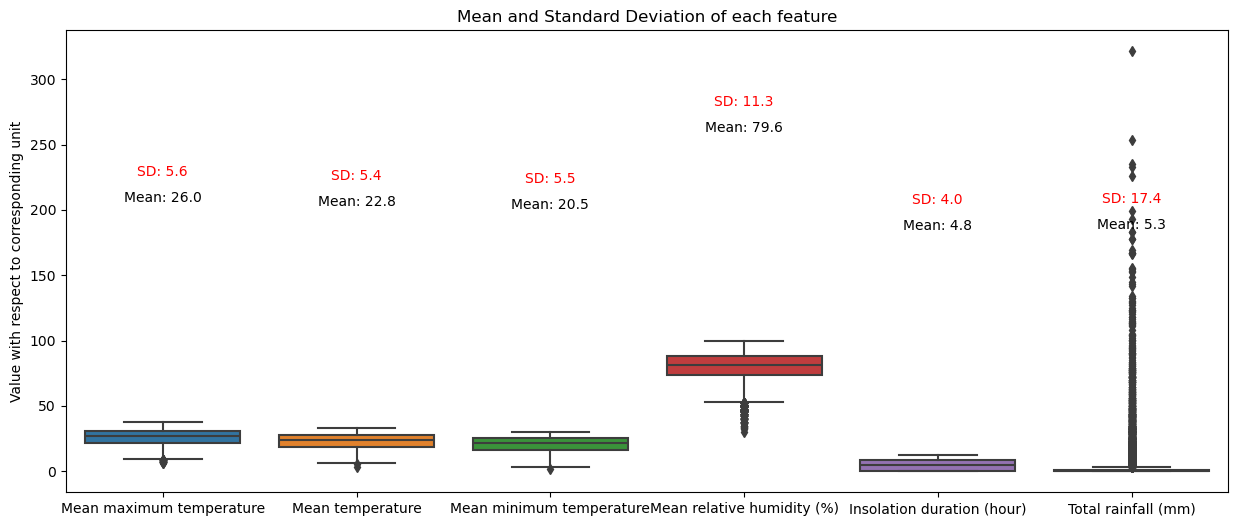

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

data_new = data[['Mean maximum temperature', 'Mean temperature', 'Mean minimum temperature', 'Mean relative humidity (%)', 'Insolation duration (hour)', 'Total rainfall (mm)']]

means = data_new.mean()
stds = data_new.std()


f, ax = plt.subplots(figsize=(15, 6))
plt.grid()
sns.boxplot(data = data) #, x = monthly_max_temperature.index, y =  monthly_max_temperature)

# Annotate mean and standard deviation on the plot
for i, (mean, std) in enumerate(zip(means, stds)):
    plt.text(i, mean + 180, f'Mean: {mean:.1f}', color='black', ha='center')
    plt.text(i, mean + 200, f'SD: {std:.1f}', color='red', ha='center')

plt.title('Mean and Standard Deviation of each feature')
plt.ylabel('Value with respect to corresponding unit')
plt.grid(axis='y')
# plt.tight_layout()
plt.show()

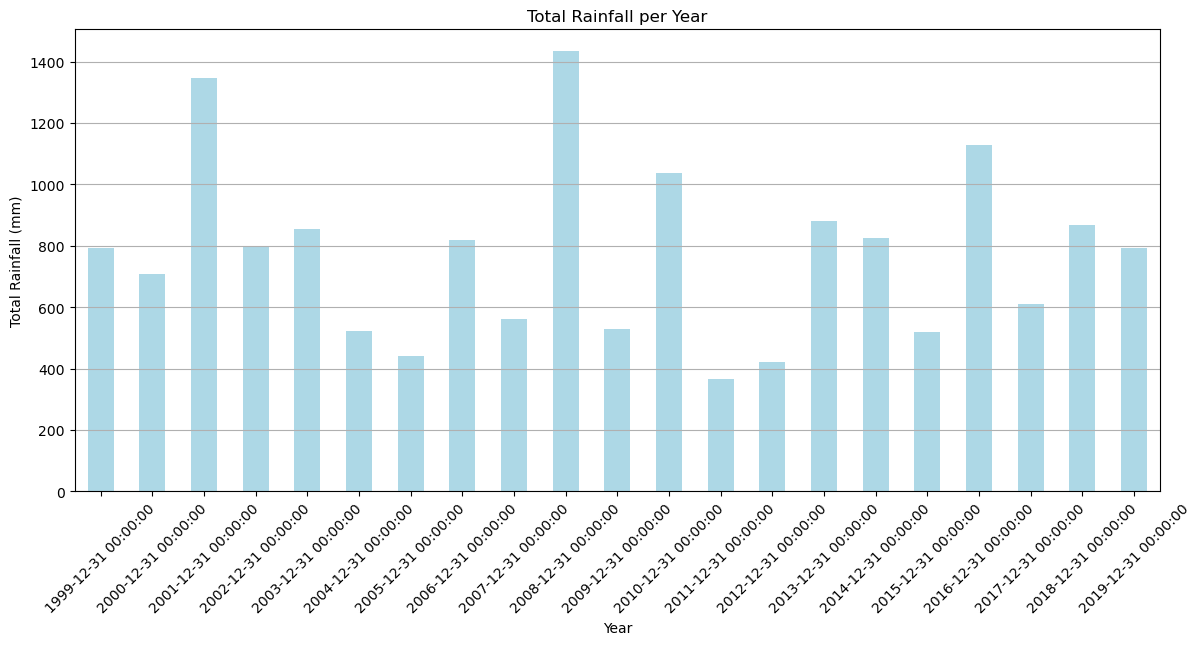

In [6]:
# Bar chart for total rainfall per year
annual_rainfall = data.resample('Y').sum()['Total rainfall (mm)']
plt.figure(figsize=(14, 6))
annual_rainfall.plot(kind='bar', color='lightblue')
plt.title('Total Rainfall per Year')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

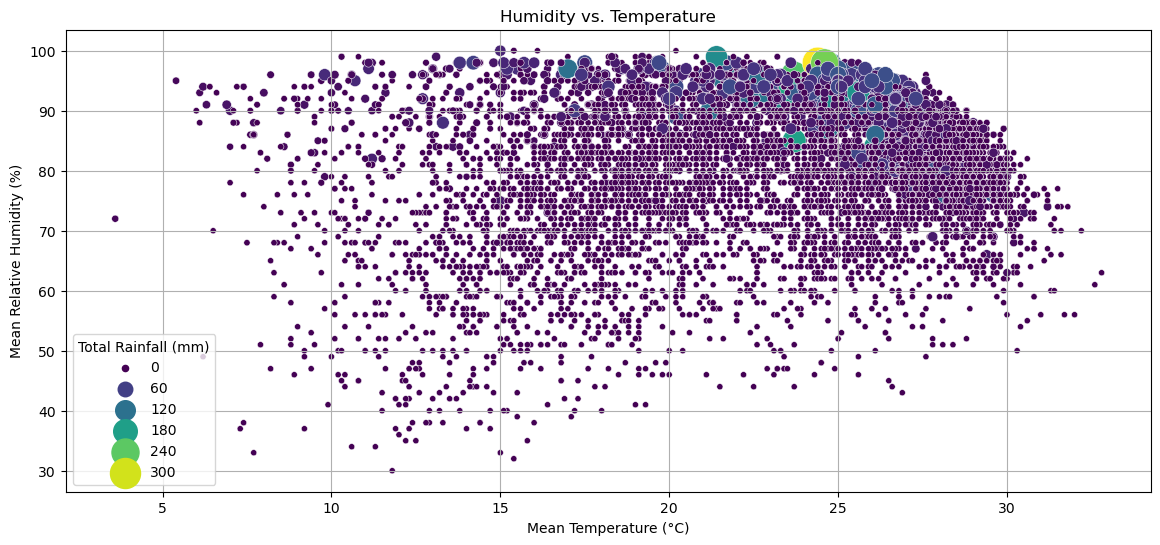

In [7]:
# Scatter plot for humidity vs. temperature
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='Mean temperature', y='Mean relative humidity (%)', hue='Total rainfall (mm)', palette='viridis', size='Total rainfall (mm)', sizes=(20, 500))
plt.title('Humidity vs. Temperature')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Mean Relative Humidity (%)')
plt.legend(title='Total Rainfall (mm)')
plt.grid()
plt.show()

## Additional Graphs that does not show in the report

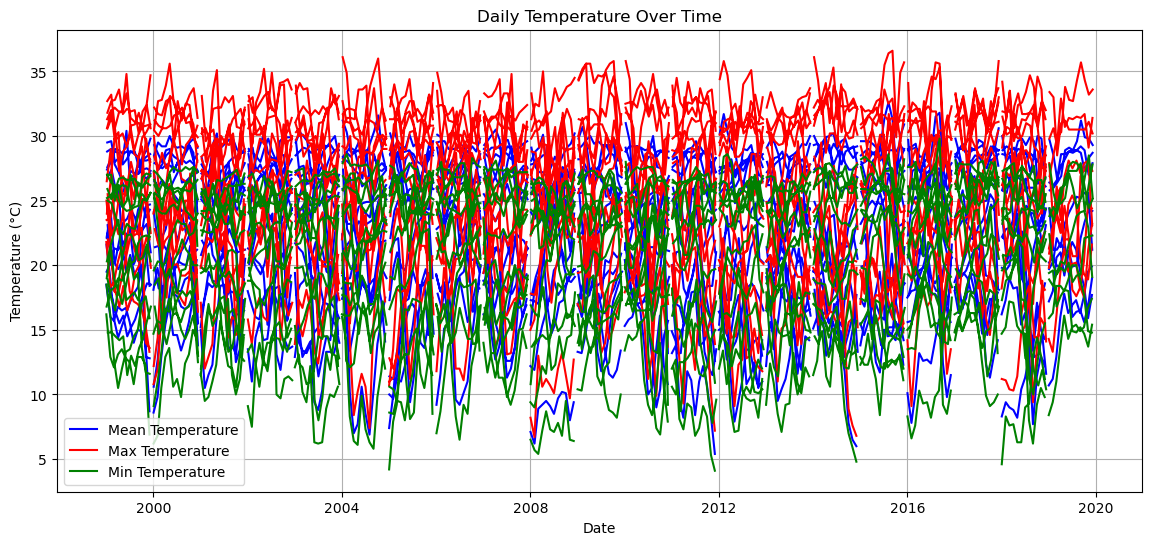

In [8]:
# Plotting temperature over time
plt.figure(figsize=(14, 6))
plt.plot(data.index, data.iloc[:,1], label='Mean Temperature', color='blue')
plt.plot(data.index, data.iloc[:,0], label='Max Temperature', color='red', linestyle='-')
plt.plot(data.index, data.iloc[:,2], label='Min Temperature', color='green', linestyle='-')
plt.title('Daily Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

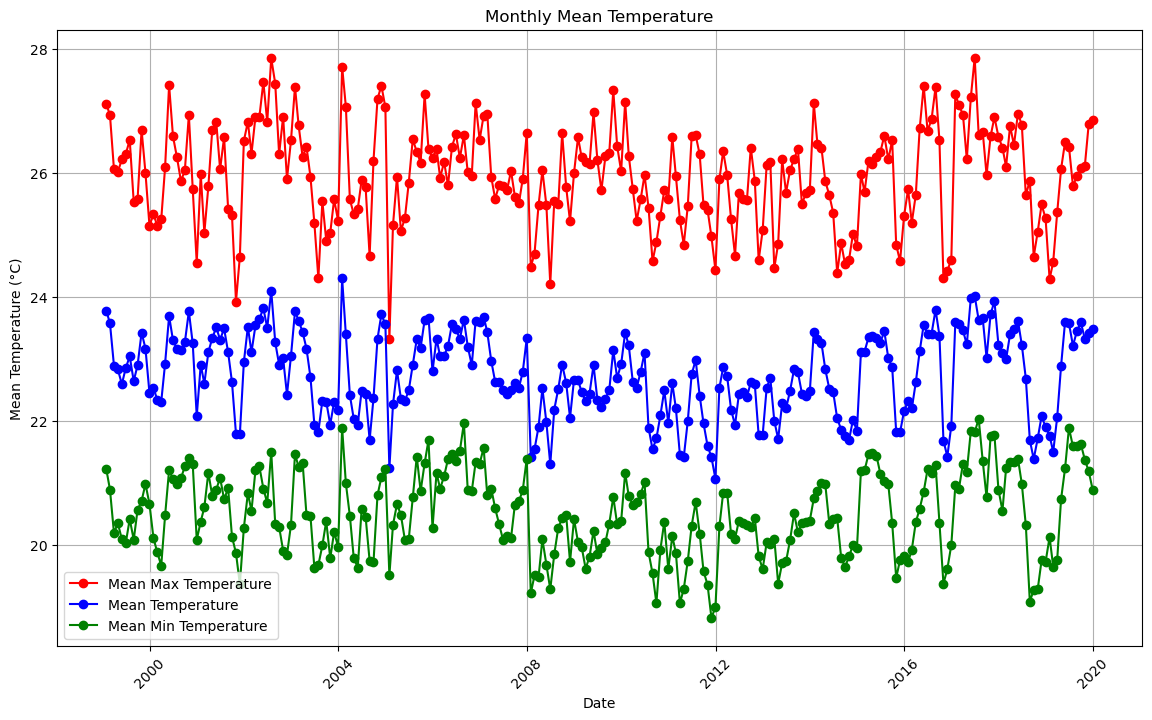

In [9]:
monthly_mean_temperature = data['Mean temperature'].resample('M').mean()
monthly_max_temperature = data['Mean maximum temperature'].resample('M').mean()
monthly_min_temperature = data['Mean minimum temperature'].resample('M').mean()

# Plotting the monthly mean temperature
plt.figure(figsize=(14, 8))
plt.plot(monthly_max_temperature.index, monthly_max_temperature, marker='o', color='red', label='Mean Max Temperature')
plt.plot(monthly_mean_temperature.index, monthly_mean_temperature, marker='o', color='blue', label='Mean Temperature')
plt.plot(monthly_min_temperature.index, monthly_min_temperature, marker='o', color='green', label='Mean Min Temperature')
plt.title('Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

# June - Aug has the highest mean temperature in between 27.5 to 30